In [3]:
# # ===== import libraries ======
import pandas as pd
from decision_trees import DecisionTree

# ===== import data; tr,ts ======
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

# **Decision Tree**

DECISION TREE:

===== Default Model =====
Training Accuracy: 1.0000
Testing Accuracy: 0.2554
Default Params: {'max_depth': None, 'min_samples_leaf': 1}


===== Tuned Model =====
Training Accuracy: 1.0000
Testing Accuracy: 0.2558
Validation (CV) Accuracy: 0.8078
Best params: {'max_depth': None, 'min_samples_leaf': 1}


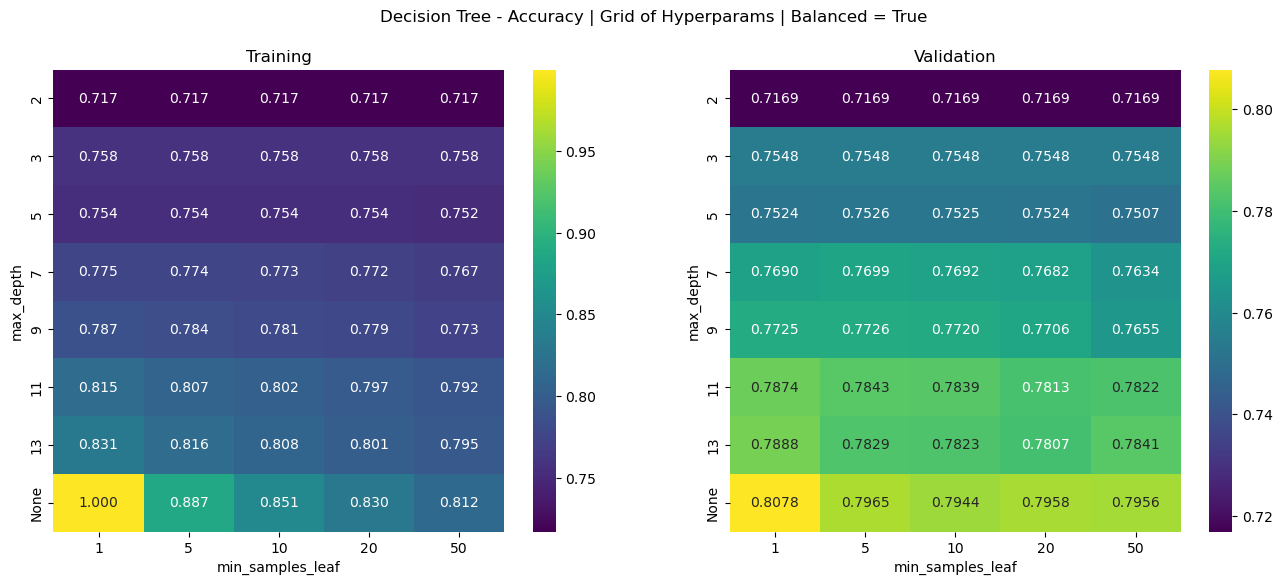

DECISION TREE:

===== Default Model =====
Training Accuracy: 1.0000
Testing Accuracy: 0.2554
Default Params: {'max_depth': None, 'min_samples_leaf': 1}


===== Tuned Model =====
Training Accuracy: 0.8607
Testing Accuracy: 0.2066
Validation (CV) Accuracy: 0.8514
Best params: {'max_depth': 9, 'min_samples_leaf': 5}


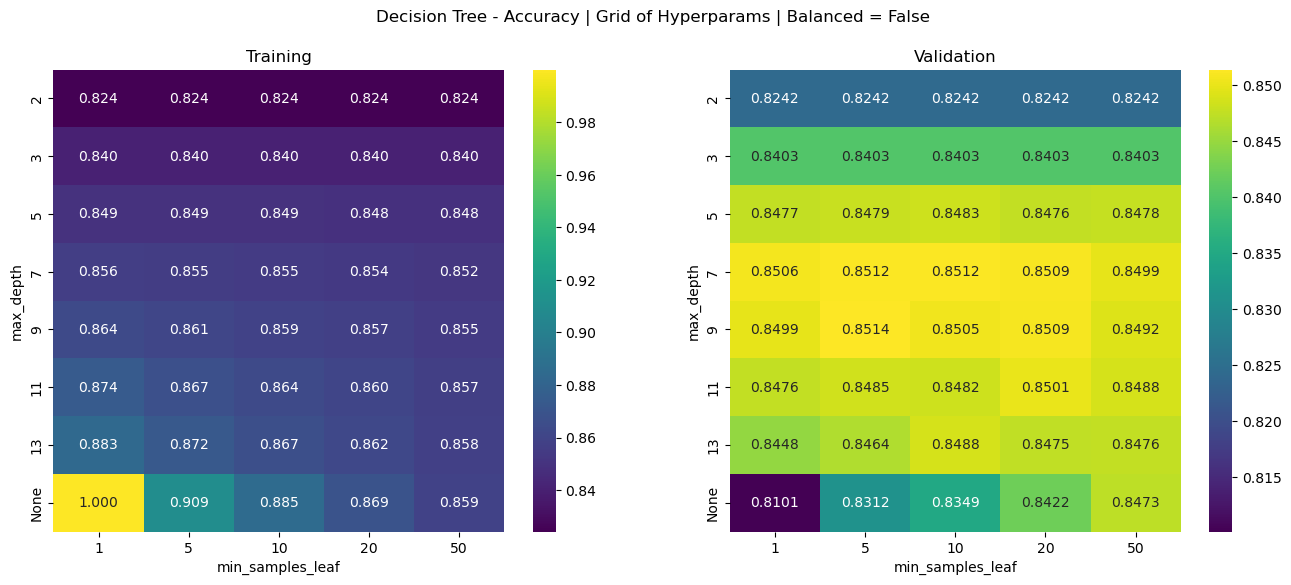

In [4]:
# ===== run pipeline ======
print('DECISION TREE:\n')
decisiontree_pipeline = DecisionTree(X_tr, X_ts, y_tr, y_ts)
decisiontree_pipeline.default_decision_tree(print_=True); # Default model
decisiontree_pipeline.tune_run(balance_classes=True) # Run CV
print('\n')
decisiontree_pipeline.best_model(print_=True); # Tuned model

decisiontree_pipeline.viz_cv

# ===== run pipeline ======
print('DECISION TREE:\n')
decisiontree_pipeline = DecisionTree(X_tr, X_ts, y_tr, y_ts)
decisiontree_pipeline.default_decision_tree(print_=True); # Default model
decisiontree_pipeline.tune_run(balance_classes=False) # Run CV
print('\n')
decisiontree_pipeline.best_model(print_=True); # Tuned model

decisiontree_pipeline.viz_cv

# **Random Forest**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [6]:
# ===== 2. Load your training and testing data =====
X_tr = pd.read_csv('split-data/processed/X_tr.csv')
X_ts = pd.read_csv('split-data/processed/X_ts.csv')
y_tr = pd.read_csv('split-data/processed/y_tr.csv')
y_ts = pd.read_csv('split-data/processed/y_ts.csv')

y_tr = y_tr.squeeze()
y_ts = y_ts.squeeze()

# ===== 3. Train default Random Forest (Overfit a bit) =====
rf_default = RandomForestClassifier(random_state=1234)
rf_default.fit(X_tr, y_tr)

y_tr_pred = rf_default.predict(X_tr)
y_ts_pred = rf_default.predict(X_ts)

print('===== Default Random Forest =====')
print(f'Training Accuracy: {accuracy_score(y_tr, y_tr_pred):.4f}')
print(f'Testing Accuracy: {accuracy_score(y_ts, y_ts_pred):.4f}')

===== Default Random Forest =====
Training Accuracy: 0.9999
Testing Accuracy: 0.2103


In [7]:
class RandomForest:

    def __init__(self, X_tr, X_ts, y_tr, y_ts):
        self.X_tr = X_tr
        self.X_ts = X_ts
        self.y_tr = y_tr
        self.y_ts = y_ts

    # ===== default model -> OVERFIT =====
    def default_random_forest(self, print_=True):

        rf_model = RandomForestClassifier(random_state=1234)
        rf_model.fit(self.X_tr, self.y_tr)

        y_tr_pred = rf_model.predict(self.X_tr)
        y_pred = rf_model.predict(self.X_ts)
        
        params = rf_model.get_params()

        keys_to_pull = ['max_depth', 'min_samples_leaf'] # List of keys you want
        filtered_dict = {k: params[k] for k in keys_to_pull}

        if print_:
            print(f'===== Default Model =====')
            print(f'Training Accuracy: {accuracy_score(self.y_tr, y_tr_pred):.4f}')
            print(f'Testing Accuracy: {accuracy_score(self.y_ts, y_pred):.4f}')
            print(f'Default Params: {filtered_dict}')
            print(f'Default Params: {params}')
    
    # ===== tune model - grid search CV =====
    def tune_run(self, param_grid=None, balance_classes=True):

        if param_grid == None:

            param_grid = {
                'n_estimators': [100],
                'max_depth': [2, 5, 10, None],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 5, 10, 50],
            }

        if balance_classes == True:
            class_weight_setting = 'balanced'
        else:
            class_weight_setting = None

        grid = GridSearchCV(
            estimator=RandomForestClassifier(random_state=1234, class_weight=class_weight_setting),
            param_grid=param_grid,
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            return_train_score=True
        )

        grid.fit(self.X_tr, self.y_tr);

        results_df = pd.DataFrame(grid.cv_results_)

        self.results_df = results_df
        self.grid = grid
        best_params = grid.best_params_
        self.best_params = best_params
        best_score = grid.best_score_
        self.best_score = best_score
        self.balance_classes = balance_classes
    

In [8]:
pipeline = RandomForest(X_tr, X_ts, y_tr, y_ts)
# pipeline.default_random_forest()
pipeline.tune_run(param_grid=None,balance_classes=True)

In [9]:
# Evaluate on training and test
rf_best = pipeline.grid.best_estimator_
y_tr_pred_best = rf_best.predict(X_tr)
y_ts_pred_best = rf_best.predict(X_ts)

print('===== Tuned Random Forest =====')
print(f'Best Parameters: {pipeline.grid.best_params_}')
print(f'Best Cross-Validation Accuracy: {pipeline.grid.best_score_:.4f}')
print(f'Training Accuracy: {accuracy_score(y_tr, y_tr_pred_best):.4f}')
print(f'Testing Accuracy: {accuracy_score(y_ts, y_ts_pred_best):.4f}')


===== Tuned Random Forest =====
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8495
Training Accuracy: 0.9999
Testing Accuracy: 0.2092


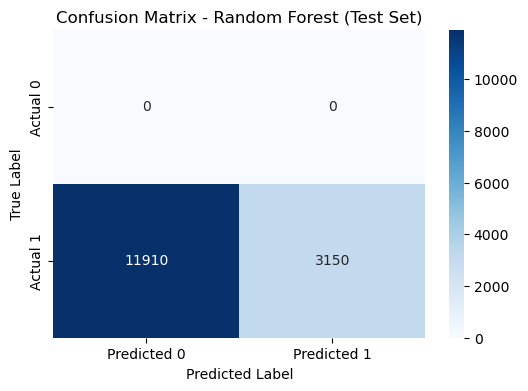

In [10]:
cm = confusion_matrix(y_ts, y_ts_pred_best)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
dt_model = TreeModel(X_train, X_test, y_train, y_test, model=DecisionTreeClassifier(random_state=0), name='Decision Tree')
dt_model.default_model()
dt_model.tune_run(param_grid={'max_depth': [3, 5, None], 'min_samples_leaf': [1, 5, 10]})
dt_model.viz_cv
dt_model.best_model()

# Random Forest
rf_model = TreeModel(X_train, X_test, y_train, y_test, model=RandomForestClassifier(random_state=0), name='Random Forest')
rf_model.default_model()
rf_model.tune_run(param_grid={'n_estimators': [50, 100], 'max_depth': [5, None]})
rf_model.best_model()
